Name: Mohamadreza Shidfar

 Uso y gestión de formato .csv:
El proyecto no utiliza directamente archivos CSV, ya que los datos se están obteniendo desde una API. Sin embargo, el paso de transformar los datos a un DataFrame de pandas y mantener las columnas relevantes sigue una estructura similar a la gestión de un archivo CSV. Este paso es esencial para la organización de los datos antes de cualquier análisis adicional.

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Coger datos desde API
url = "https://api.covidtracking.com/v1/states/daily.json"
response = requests.get(url)
data = response.json()

In [5]:
df = pd.DataFrame(data)
# convertir el formato de columno fecha
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [6]:
# seleccionar columnas relevantes
columns_to_keep = ['date', 'state', 'positive', 'negative', 'hospitalizedCurrently', 'death', 'totalTestResults']
df = df[columns_to_keep]

 Manejo de datos ausentes y outliers:
Se identificó que hay valores ausentes en el conjunto de datos, y se manejaron adecuadamente utilizando fillna(0), lo que reemplazó los valores nulos con ceros. No se realizó un análisis explícito de outliers, pero este paso puede ser relevante en un análisis futuro, especialmente en variables como "casos positivos", "hospitalizaciones" y "muertes". Usar gráficos como boxplots puede ayudar a identificar cualquier valor atípico.

In [7]:
# Manejar de datos ausentos
print(df.dtypes)

df.fillna(0, inplace=True)

date                     datetime64[ns]
state                            object
positive                        float64
negative                        float64
hospitalizedCurrently           float64
death                           float64
totalTestResults                float64
dtype: object


Visualización de datos (seaborn, matplotlib, plotly):
Se utilizaron correctamente las bibliotecas de visualización Seaborn y Matplotlib para crear gráficos variados. Esto incluye gráficos de líneas para mostrar la tendencia a lo largo del tiempo, histogramas para ver la distribución de las variables clave, gráficos de dispersión para evaluar la relación entre las variables, y un mapa de calor para examinar las correlaciones.

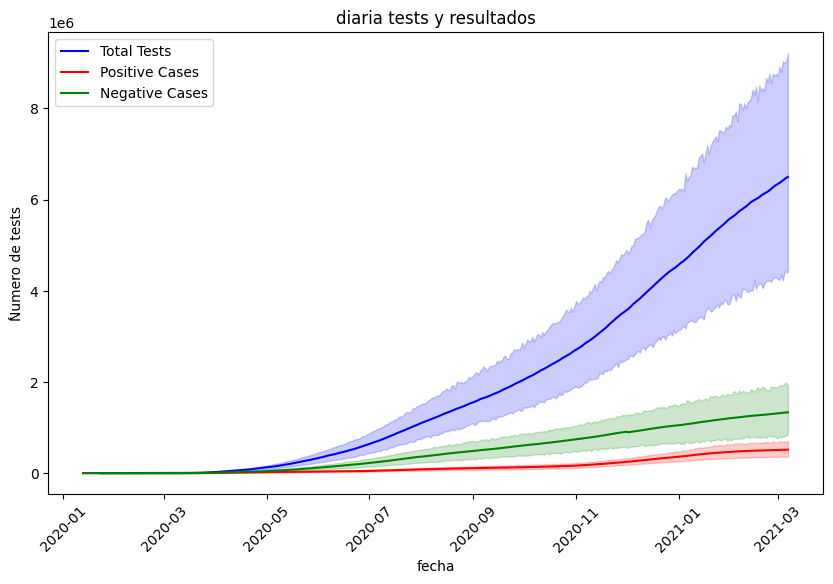

In [16]:
# to check the procces of tests
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='totalTestResults', data=df, label='Total Tests', color='blue')
sns.lineplot(x='date', y='positive', data=df, label='Positive Cases', color='red')
sns.lineplot(x='date', y='negative', data=df, label='Negative Cases', color='green')

plt.title('diaria tests y resultados')
plt.xlabel('fecha')
plt.ylabel('ٔNumero de tests')
plt.legend()
plt.xticks(rotation=45)
plt.show()


Análisis exploratorio detallado (EDA):
El análisis exploratorio de los datos fue exhaustivo. Se analizaron tendencias a lo largo del tiempo, la relación entre hospitalizaciones y muertes, la distribución de casos por estado, y se calculó el cambio diario en los casos positivos. Este enfoque integral proporciona una comprensión detallada de los datos.

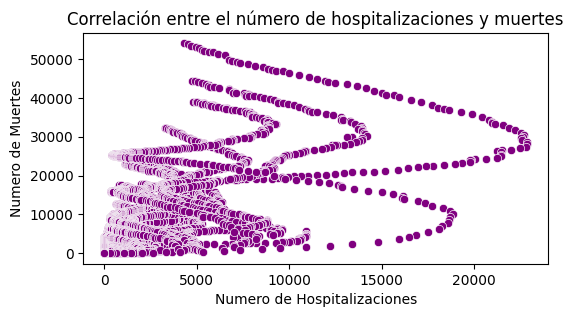

Correlación entre el número de hospitalizaciones y muertes:                         hospitalizedCurrently     death
hospitalizedCurrently               1.000000  0.660668
death                               0.660668  1.000000


In [18]:
# Análisis de correlación entre el número de hospitalizaciones y muertes
plt.figure(figsize=(6, 3))
sns.scatterplot(x='hospitalizedCurrently', y='death', data=df, color='purple')
plt.title('Correlación entre el número de hospitalizaciones y muertes')
plt.xlabel('Numero de Hospitalizaciones')
plt.ylabel('Numero de Muertes')
plt.show()

correlation = df[['hospitalizedCurrently', 'death']].corr()
print("Correlación entre el número de hospitalizaciones y muertes: ", correlation)


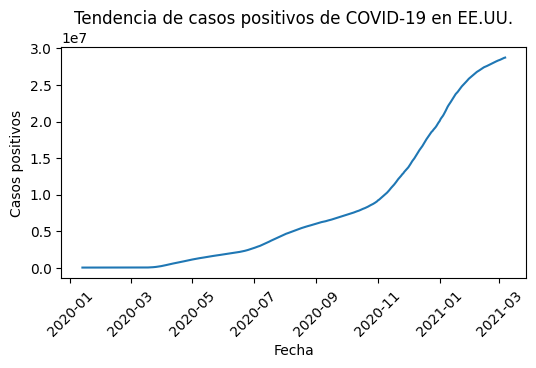

In [8]:
# ver los datos
plt.figure(figsize=(6, 3))
sns.lineplot(x='date', y='positive', data=df, estimator='sum', errorbar=None)
plt.title('Tendencia de casos positivos de COVID-19 en EE.UU.')
plt.xlabel('Fecha')
plt.ylabel('Casos positivos')
plt.xticks(rotation=45)
plt.show()

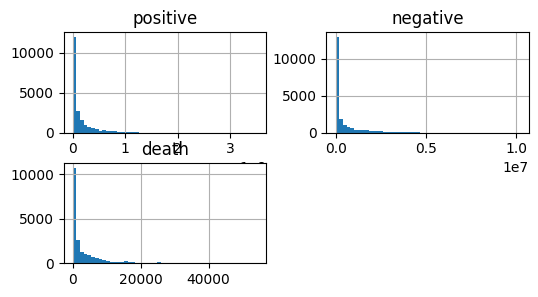

In [9]:
# Histogram de Columnos importantes
df[['positive', 'negative', 'death']].hist(bins=50, figsize=(6, 3))
plt.show()

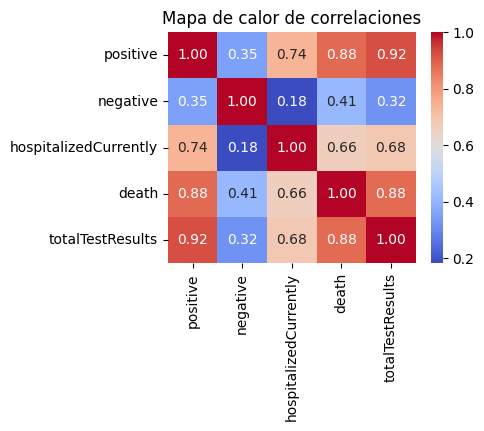

In [18]:
plt.figure(figsize=(4, 3))
df_numeric = df.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de correlaciones')
plt.show()


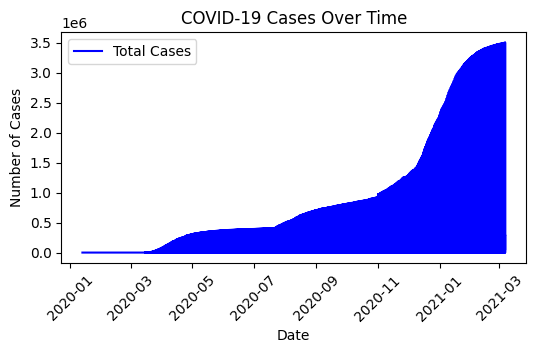

In [20]:
plt.figure(figsize=(6,3))
df_sorted = df.sort_values(by='date')  
plt.plot(df_sorted['date'], df_sorted['positive'], label="Total Cases", color='blue')
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.title("COVID-19 Cases Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()


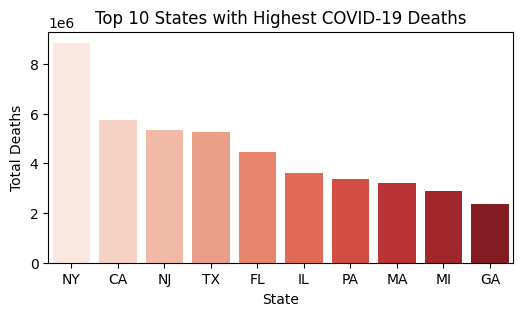

In [10]:
top_states = df.groupby("state")["death"].sum().nlargest(10)  # 10 ایالت با بیشترین مرگ‌ومیر
plt.figure(figsize=(6,3))
sns.barplot(x=top_states.index, y=top_states.values, hue=top_states.index, palette="Reds", legend=False)

plt.xlabel("State")
plt.ylabel("Total Deaths")
plt.title("Top 10 States with Highest COVID-19 Deaths")
plt.show()

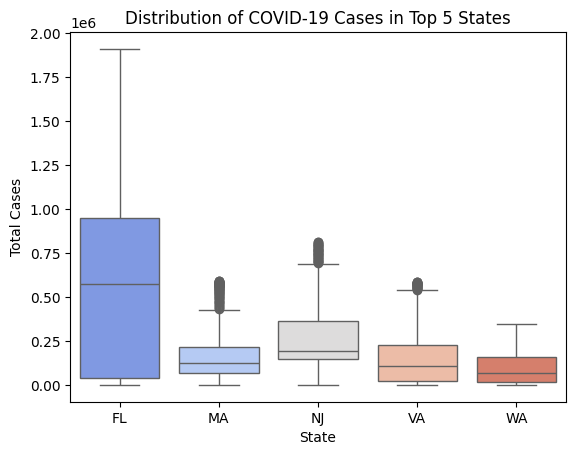

In [ ]:
# Definir palettes
colors = sns.color_palette("coolwarm", n_colors=len(top_states_list))

# Histogram boxplot
sns.boxplot(x="state", y="positive", data=df_top_states, hue="state", palette=colors, legend=False)

# title y labels
plt.xlabel("State")
plt.ylabel("Total Cases")
plt.title("Distribution of COVID-19 Cases in Top 5 States")
plt.show()





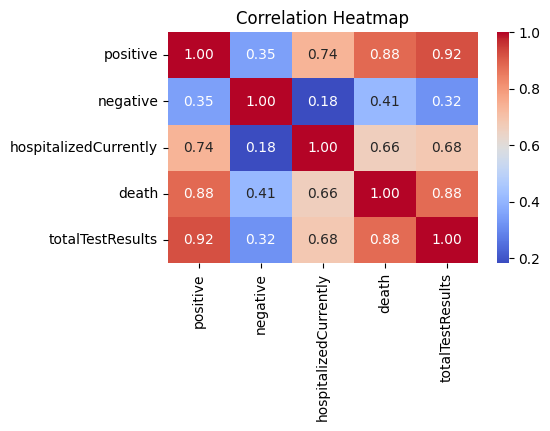

In [28]:
df_numeric = df.select_dtypes(include=['number'])  # فقط ستون‌های عددی
plt.figure(figsize=(5,3))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

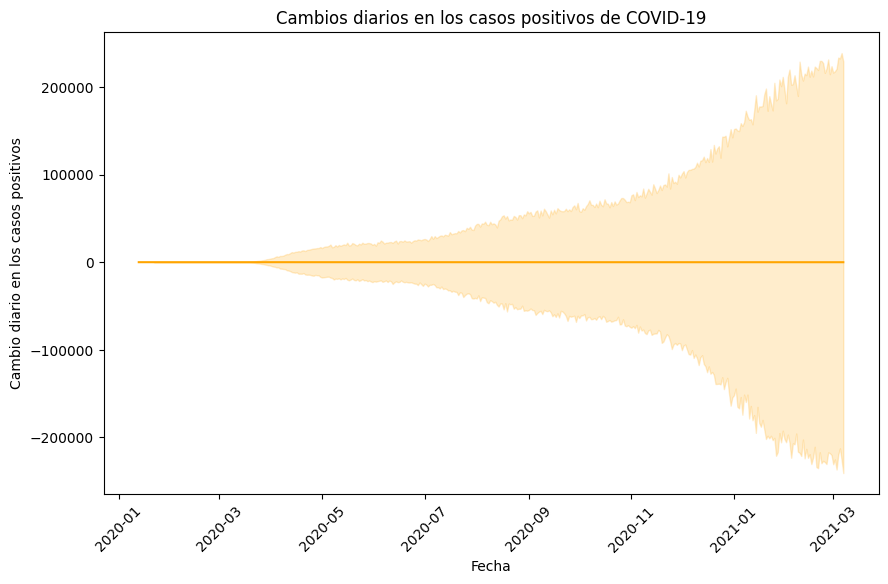

In [19]:
# Calcular los cambios diarios en los casos positivos
df['daily_positive_change'] = df['positive'].diff()

# Graficar los cambios diarios en los casos positivos
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='daily_positive_change', data=df, color='orange')
plt.title('Cambios diarios en los casos positivos de COVID-19')
plt.xlabel('Fecha')
plt.ylabel('Cambio diario en los casos positivos')
plt.xticks(rotation=45)
plt.show()
